In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate data

In [390]:
df_data=pd.read_csv("Data.csv")
df_sector=pd.read_csv("SP500constituents.csv")

/Users/yuehan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,9,19,48,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
'BRK-B' in df_data['TICKER'].unique()

False

In [4]:
df_sector.rename(columns={'Symbol':'TICKER'}, inplace=True)

In [5]:
df= pd.merge(df_data,df_sector,on="TICKER")

In [6]:
selectstock =['MSFT','AAPL','AMZN','GOOG','GOOGL','FB',
       'JNJ','V','PG','JPM','UNH','MA','INTC','VZ','HD','T',
       'PFE','MRK','PEP','NVDA','UNH','DIS','CRM','ADBE',
       'PYPL','CMCSA','BAC','KO','NFLX','WMT','CSCO',
       'COST','NKE','XOM','CVX','ACN','TXN','DHR','NEE','ALXN',
       'IRM', 'ANSS', 'ETFC', 'NOV', 'ZION', 'MNST', 'DGX','YUM',
       'CHRW', 'MTD', 'ADSK', 'URI', 'VRSN', 'PWR']

In [7]:
selectstock=list(set(selectstock))
print(len(selectstock))

53


In [8]:
df=df[df.TICKER.isin(selectstock)]

In [9]:
df.to_csv("AllData.csv",index=False)

# Read data from here

In [10]:
df=pd.read_csv("AllData.csv")

In [11]:
df.columns

Index(['PERMNO', 'date', 'NAMEENDT', 'SHRCD', 'EXCHCD', 'SICCD', 'NCUSIP',
       'TICKER', 'COMNAM', 'SHRCLS', 'TSYMBOL', 'NAICS', 'PRIMEXCH', 'TRDSTAT',
       'SECSTAT', 'PERMCO', 'ISSUNO', 'HEXCD', 'HSICCD', 'CUSIP', 'DCLRDT',
       'DLAMT', 'DLPDT', 'DLSTCD', 'NEXTDT', 'PAYDT', 'RCRDDT', 'SHRFLG',
       'HSICMG', 'HSICIG', 'DISTCD', 'DIVAMT', 'FACPR', 'FACSHR', 'ACPERM',
       'ACCOMP', 'NWPERM', 'DLRETX', 'DLPRC', 'DLRET', 'TRTSCD', 'NMSIND',
       'MMCNT', 'NSDINX', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'BID', 'ASK',
       'SHROUT', 'CFACPR', 'CFACSHR', 'OPENPRC', 'NUMTRD', 'RETX', 'vwretd',
       'vwretx', 'ewretd', 'ewretx', 'sprtrn', 'Name', 'Sector'],
      dtype='object')

In [12]:
df=df[['date','TICKER','VOL','PRC','OPENPRC','DIVAMT','FACPR','Sector','RET']]
df.isna().sum()

date            0
TICKER          0
VOL             0
PRC             0
OPENPRC         0
DIVAMT     164375
FACPR      164375
Sector          0
RET             0
dtype: int64

In [101]:
dfgoog=get_factor(df,'GOOGL',2015,2016)
dfgoog

,date,TICKER,priceFactor,volumeFactor,MeanReversion,OvernightSentiment,TrendingFactor_2d,TrendingFactor_5d,21daystd,forwardReturn
21,20150203,GOOGL,0.020905,-0.474138,-0.002065,-0.004247,-0.262103,0.085217,0.018225,-0.013501
22,20150204,GOOGL,0.002065,-0.471121,0.013593,-0.000300,1.180764,-0.489857,0.017965,0.007090
23,20150205,GOOGL,-0.011528,-0.328148,-0.007065,0.003478,-1.105930,0.214266,0.017030,0.007634
24,20150206,GOOGL,-0.004463,-0.021519,-0.007605,0.002227,0.518490,-1.145964,0.017024,-0.008607
25,20150209,GOOGL,0.003142,0.257970,0.008644,-0.005273,8.851654,1.618930,0.017202,0.020556
...,...,...,...,...,...,...,...,...,...,...
498,20161222,GOOGL,-0.000369,0.137683,0.003108,-0.003817,0.457439,0.425129,0.009660,-0.002322
499,20161223,GOOGL,-0.003108,-0.254091,0.002325,-0.002063,0.428031,0.929863,0.009475,0.002637
500,20161227,GOOGL,-0.005432,-0.391269,-0.002633,0.001089,8.373788,-0.838458,0.009477,-0.006618
501,20161228,GOOGL,0.000000,0.242846,0.006640,0.004198,1.662337,0.505729,0.009567,-0.002101


In [354]:
def get_factor(df, tic, start, end):
    startdate=start*10000+101
    enddate=end*10000+1231
    #print(startdate,enddate)
    dfstock=df.loc[df['date']>=startdate]
    dfstock=dfstock.loc[df['date']<=enddate]
    dfstock=dfstock.loc[df['TICKER']==tic]
    dfstock=dfstock.sort_values(by='date')
    dfstock['DIVAMT'].fillna(0,inplace=True)
    dfstock['FACPR'].replace({0:1},inplace=True)
    dfstock['FACPR'].fillna(1,inplace=True)
    dfstock.reset_index(inplace=True)
    
    dfstock['Split']=dfstock['FACPR'].cumprod()
    dfstock['AdjDiv']=dfstock['Split']*dfstock['DIVAMT']
    dfstock['CumDiv']=dfstock['AdjDiv'].cumsum()
    dfstock['AdjPrice']=dfstock['PRC']*dfstock['Split']+dfstock['CumDiv']
    #New adjusted price according to previous day
    dfstock['NewAdjustPrice']=dfstock['PRC']*dfstock['FACPR']+dfstock['DIVAMT']
    dfstock['adjustOPENPRC'] = dfstock['OPENPRC']*dfstock['FACPR']+dfstock['DIVAMT']
    
    # Price Factor
    dfstock['Median']=dfstock['AdjPrice'].rolling(5).median()
    dfstock['AdjMedian']=(dfstock['Median']-dfstock['CumDiv'])/dfstock['Split']
    dfstock['priceFactor']=np.log(dfstock['PRC'].shift(1)/dfstock['AdjMedian'].shift(1))
    
    # Volume Factor
    dfstock['AdjVol']=dfstock['VOL']/dfstock['Split']
    dfstock['volumeFactor']=np.log(dfstock['AdjVol'].shift(1)/dfstock['AdjVol'].shift(2))
    
    # Volume benchmark first day
    dfstock['NewAdjVol']=dfstock['VOL']/dfstock['FACPR']
    dfstock['21MedianVol']=dfstock['NewAdjVol'].rolling(21).median()*dfstock['FACPR']
    
    #Mean Reversion Factor
    dfstock['MeanReversion']=-np.log(dfstock['adjustOPENPRC']/dfstock['OPENPRC'].shift(1))
    
    #Trending Factor
    dfstock['Return'] = (dfstock['NewAdjustPrice']-dfstock['PRC'].shift(1))/dfstock['PRC'].shift(1)
    dfstock['2dayreturn']=dfstock['Return'].rolling(2).sum()
    dfstock['TrendingFactor_2d']=dfstock['Return']/dfstock['2dayreturn'].shift(1)
    #dfstock['TrendingFactor_2d'] = np.sign(dfstock['Return']/dfstock['2dayreturn'])*np.log(abs(dfstock['Return']/dfstock['2dayreturn']))
    dfstock['5dayreturn']=dfstock['Return'].rolling(5).sum()
    #dfstock['TrendingFactor_5d'] = np.sign(dfstock['Return']/dfstock['5dayreturn'])*np.log(abs(dfstock['Return']/dfstock['5dayreturn']))
    dfstock['TrendingFactor_5d']=dfstock['Return']/dfstock['5dayreturn'].shift(1)
    
    #Overnight Sentiment (we need to adjust OPENPRC)
    dfstock['OvernightSentiment']= dfstock['adjustOPENPRC']/dfstock['PRC'].shift(1)-1
    
    dfstock['21daystd']=dfstock['Return'].shift(1).rolling(21).std()
    
    # Transaction
    dfstock['TC']=0.004*dfstock['21daystd']*np.sqrt(250)/dfstock['21MedianVol']*dfstock['PRC'].shift(1)
    
    #Mean Reversion and sector neutral factor
    #dfstock['MeanReversion_SectorNeutral']=-np.log((df['NewAdjustPrice'].groupby(sector)/df['NewAdjustPrice'].demean(groupby=sector).shift(1)))
    
    # Forward Return
    dfstock['forwardReturn'] = (dfstock['PRC'].shift(-1)
                        *(dfstock['Split'].shift(-1)/dfstock['Split'])
                        +((dfstock['CumDiv'].shift(-1)
                        -dfstock['CumDiv'])/dfstock['Split'])-dfstock['PRC']-dfstock['TC'])/dfstock['PRC']
    
    
    dfstock.dropna(inplace=True)
    return dfstock[['date','TICKER','priceFactor','volumeFactor','MeanReversion','OvernightSentiment',
                    'TrendingFactor_2d','TrendingFactor_5d','21daystd','forwardReturn']]

In [355]:
dffactorin=pd.DataFrame()
dfinret=pd.DataFrame()
for i in selectstock:
    #print(i)
    dftemp=get_factor(df,i,2015,2016)
    dffactorin=pd.concat([dffactorin, dftemp])
    dftemp.rename(columns={'forwardReturn':i},inplace=True)
    dfinret=pd.concat([dfinret,dftemp[i]],axis=1)

In [356]:
dffactorout=pd.DataFrame()
dfoutret=pd.DataFrame()
for i in selectstock:
    #print(i)
    dftemp=get_factor(df,i,2017,2017)
    dffactorout=pd.concat([dffactorout, dftemp])

In [357]:
yin=dffactorin.iloc[:,-1]
Xin=dffactorin.iloc[:,2:-1]
yout=dffactorout.iloc[:,-1]
Xout=dffactorout.iloc[:,2:-1]
print(Xin.shape,yin.shape,Xout.shape,yout.shape)

(25357, 7) (25357,) (12084, 7) (12084,)


In [406]:
dffactorout

,date,TICKER,priceFactor,volumeFactor,MeanReversion,OvernightSentiment,TrendingFactor_2d,TrendingFactor_5d,21daystd,forwardReturn,predReturn
22,20170203,CMCSA,-0.004385,-0.157027,0.001858,0.002797,-0.519472,-0.421776,0.008895,-0.009567,0.000651
23,20170206,CMCSA,-0.001062,-0.105144,0.001462,-0.000930,2.073685,1.055480,0.008718,0.004293,0.000404
24,20170207,CMCSA,-0.009613,0.157997,0.007074,0.001610,-0.587849,-0.405030,0.009176,-0.002271,0.000167
25,20170208,CMCSA,-0.003068,-0.025627,-0.002675,0.000000,0.430598,0.308209,0.009176,0.004552,0.000303
26,20170209,CMCSA,-0.002273,-0.106705,0.002273,0.000000,2.251208,-0.374410,0.009174,0.001599,0.000467
...,...,...,...,...,...,...,...,...,...,...,...
245,20171221,ACN,0.000000,0.440468,-0.026713,0.029984,77.654380,7.166387,0.006251,-0.002010,0.000530
246,20171222,ACN,0.012924,0.353031,0.003332,0.010246,-0.153965,-0.101613,0.006791,-0.005848,0.000095
247,20171226,ACN,0.010911,-0.920033,0.017092,-0.004874,-0.413756,-0.714508,0.006606,0.002157,0.001552
248,20171227,ACN,0.000000,-0.183042,-0.000653,0.001634,-0.274475,0.253937,0.006822,0.001631,0.000552


In [359]:
import statsmodels.api as sm
X = sm.add_constant(Xin,prepend=True)
mod = sm.OLS(yin,Xin)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          forwardReturn   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.433
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           5.72e-08
Time:                        19:26:53   Log-Likelihood:                 64772.
No. Observations:               25357   AIC:                        -1.295e+05
Df Residuals:                   25350   BIC:                        -1.295e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
priceFactor           -0.0009      0

In [360]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(Xin, yin)
reg.score(Xin, yin)
yinpred=reg.predict(Xin)
youtpred=reg.predict(Xout)

In [361]:
from sklearn.metrics import mean_squared_error
def compute_metrics(ypred,ytrue,insample=True):
    if insample:
        print("In-sample:")
    else:
        print("Out-sample:")
    print("Mean of Residual:",np.mean(ytrue-ypred))
    print("SD of residual:",np.std(ytrue-ypred))
    print("Reduced Mean-square residuals:",np.sum((ypred-ytrue)**2)/(len(ypred)-8))

In [404]:
compute_metrics(yinpred,yin,True)
compute_metrics(youtpred,yout,False)
# Coefficients
print(reg.coef_,reg.intercept_)
print(reg.score(Xout,yout))

In-sample:
Mean of Residual: 3.828379142557661e-19
SD of residual: 0.018810111349940536
Reduced Mean-square residuals: 0.00035393195266484077
Out-sample:
Mean of Residual: 0.000652500294639788
SD of residual: 0.012726105067571599
Reduced Mean-square residuals: 0.00016248707854238622
[-8.67552882e-04 -1.55381853e-03  7.94758206e-03  4.13656445e-02
  6.08797905e-18 -5.68575767e-08  3.24952414e-02] -1.6626600926998103e-05
-0.005297642194688423


# In-sample covariance matrix

In [363]:
allcov=dfinret.cov()

# Trading strategy

In [364]:
dffactorout['predReturn']=reg.predict(Xout)
#dfreturn=pd.DataFrame(youtpred,columns=['return'],index=dffactorout.index)
#dfreturn=pd.concat([dffactorout[['date','TICKER']], dfreturn], axis=1)
#dfreturn=dfreturn[dfreturn['return']>0]

In [365]:
dfoutdata=dffactorout[dffactorout['predReturn']>0]
dfoutdata[['date','TICKER','predReturn','21daystd']].to_excel("RetStd.xlsx",index=False)

In [366]:
dfstrategy=pd.DataFrame(dfoutdata.groupby('date')['TICKER'].apply(list))
dfstrategy.to_excel("Strategy.xlsx")

# Markowitz

In [367]:
import cvxpy as cvx

def get_optimal_weights(covariance_returns, num_tickers):
    """
    Goal: Find the optimal weights
    Parameters
    ----------
    covariance_returns : The covariance of the returns
    num_tickers: number of stocks that we want to trade
    -------
    x : 1 dimensional Ndarray
        The solution for x
    """
    assert covariance_returns.shape[0] == covariance_returns.shape[1]  

    x = cvx.Variable(num_tickers)
    objective = cvx.Minimize(cvx.quad_form(x,covariance_returns))
    
    constraints = [sum(x)==1,x>=0,]
    
    problem = cvx.Problem(objective,constraints)
    
    min_value = problem.solve()
    
    return x.value

In [368]:
weights_list = []
for i in range(len(dfstrategy)):
    date=dfstrategy.index[i]
    stocks=dfstrategy.iloc[i,0]
    ret=dfoutdata[dfoutdata['date']==date]['predReturn'].to_numpy()
    truereturn=dfoutdata[dfoutdata['date']==date]['forwardReturn'].to_numpy()
    #print(truereturn)
    n=len(stocks)
    cov=np.zeros((n,n))
    for j in range(n):
        for k in range(j+1):
            cov[j,k]=allcov.loc[stocks[j],stocks[k]]
            cov[k,j]=allcov.loc[stocks[k],stocks[j]]
    #print(np.dot(truereturn,get_optimal_weights(cov,n)))
    weights_list.append([round(num,3) for num in get_optimal_weights(cov,n)])
    

In [369]:
for i in range(len(dfstrategy)):
    stocks=dfstrategy.iloc[i,0]
    if len(stocks)!=len(weights_list[i]):
        print(i)

# Backtest

In [370]:
pricedata=df[df['date']>=20170101]
pricedata=df[df['date']<=20171231]

In [375]:
def get_price(df, tic, start, end):
    startdate=start*10000+101
    enddate=end*10000+1231
    #print(startdate,enddate)
    dfstock=df.loc[df['date']>=startdate]
    dfstock=dfstock.loc[df['date']<=enddate]
    dfstock=dfstock.loc[df['TICKER']==tic]
    dfstock=dfstock.sort_values(by='date')
    dfstock['DIVAMT'].fillna(0,inplace=True)
    dfstock['FACPR'].replace({0:1},inplace=True)
    dfstock['FACPR'].fillna(1,inplace=True)
    dfstock.reset_index(inplace=True)
    
#    dfstock['Split']=dfstock['FACPR'].cumprod()
#    dfstock['AdjDiv']=dfstock['Split']*dfstock['DIVAMT']
#    dfstock['CumDiv']=dfstock['AdjDiv'].cumsum()
#    dfstock['AdjPrice']=dfstock['OPENPRC']*dfstock['Split']+dfstock['CumDiv']
    #New adjusted price according to previous day
    dfstock['NextPRC']=(dfstock['PRC']*dfstock['FACPR']+dfstock['DIVAMT']).shift(-1)
    dfstock['Return'] = (dfstock['NextPRC']-dfstock['PRC'].shift(1))/dfstock['PRC'].shift(1)
    dfstock['21daystd']=dfstock['Return'].shift(1).rolling(21).std()
    
    # Volume benchmark first day
    dfstock['NewAdjVol']=dfstock['VOL']/dfstock['FACPR']
    dfstock['21MedianVol']=dfstock['NewAdjVol'].rolling(21).median()*dfstock['FACPR']
    
    dfstock.dropna(inplace=True)
    return dfstock[['date','TICKER','PRC','NextPRC','21MedianVol','21daystd']]

In [376]:
dfprice=pd.DataFrame()
for i in selectstock:
    dftemp=get_price(pricedata,i,2017,2017)
    dfprice=pd.concat([dfprice, dftemp])

In [377]:
dfprice

,date,TICKER,PRC,NextPRC,21MedianVol,21daystd
22,20170203,CMCSA,75.26000,74.54000,9068450.0,0.010749
23,20170206,CMCSA,74.54000,74.86000,9068450.0,0.011043
24,20170207,CMCSA,74.86000,74.69000,9068450.0,0.011341
25,20170208,CMCSA,74.69000,75.03000,9006902.0,0.011339
26,20170209,CMCSA,75.03000,75.15000,9002111.0,0.011330
...,...,...,...,...,...,...
245,20171221,ACN,154.20000,153.89000,1971617.0,0.006399
246,20171222,ACN,153.89000,152.99001,1971617.0,0.006795
247,20171226,ACN,152.99001,153.32001,1971617.0,0.007144
248,20171227,ACN,153.32001,153.57001,1971617.0,0.007331


In [374]:
def get_daily_value(currvalue,preprice,newprice,weights,std,vol):
    if len(preprice)!=len(weights):
        print("Not Equal!")
        return
    newvalue=0
    tc=0
    for i in range(len(weights)):
        stockshare=(currvalue*weights[i]/preprice[i])
        newvalue+=stockshare*newprice[i]
        tc+=0.004*std[i]*np.sqrt(250)*stockshare/vol[i]*preprice[i]
    return newvalue

In [378]:
currvaluem=100
currvaluee=100
value_equal=[]
value_markowitz=[]
for i in range(len(dfstrategy)):
    date=dfstrategy.index[i]
    stocks=dfstrategy.iloc[i,0]
    nowprice=[]
    nextprice=[]
    std=[]
    vol=[]
    n=len(stocks)
    weights=[1/n]*n
    for j in stocks:
        nowprice.append(dfprice.loc[(dfprice['date']==date) & (dfprice['TICKER']==j)]['PRC'].values[0])
        nextprice.append(dfprice.loc[(dfprice['date']==date) & (dfprice['TICKER']==j)]['NextPRC'].values[0])
        std.append(dfprice.loc[(dfprice['date']==date) & (dfprice['TICKER']==j)]['21daystd'].values[0])
        vol.append(dfprice.loc[(dfprice['date']==date) & (dfprice['TICKER']==j)]['21MedianVol'].values[0])
    currvaluem=get_daily_value(currvaluem,nowprice,nextprice,weights_list[i],std,vol)
    currvaluee=get_daily_value(currvaluee,nowprice,nextprice,weights,std,vol)
    #print(date)
    #print(len(stocks),len(nowprice),len(weights_list[i]))
    value_equal.append(currvaluee)
    value_markowitz.append(currvaluem)
    print(currvaluem,currvaluee)

99.85428666703086 99.77119914081511
100.30457001676542 100.26276817756947
101.14891045230836 100.36489426249511
101.3018723558553 100.97445632985148
101.61012044207177 101.16271401748095
101.6115615815796 101.53292946111421
102.08327312014245 102.1069476425583
102.80334675615048 102.61499116788377
103.1593856868072 102.62129124621794
103.5545971818157 102.68152865199092
104.24221362855248 103.5152052819186
104.21609704598272 103.34142372552552
104.83015239492035 103.12154133641805
105.52848548874269 103.48071015321176
105.24296334501544 103.30940917853276
105.05435647120179 102.66354195540801
105.63244083290238 104.05852998993338
105.45607961703166 102.97585549287766
104.85639732312572 102.9070808453719
104.38546370307496 102.57681272225702
104.01338605132153 102.37312343961123
103.71528548443598 102.04476991453271
104.0985386322195 101.98261428789296
104.70892731337818 102.45309756793459
104.47258038157477 102.59479534213853
104.41982948888577 102.24733028898099
105.20822422397322 103

114.92561359901347 121.07431801278712
114.70639615651623 121.69721988460903
114.3463974618176 121.11627084675166
114.46068936005892 121.09762492828936
114.4412027850002 121.47046097035401
114.30771415464007 121.34521839364257
114.52762274442925 121.23680586325598
114.66553101772014 121.35535882269532
114.62996634516304 121.65119434940101
114.15040857475857 120.99994256490518


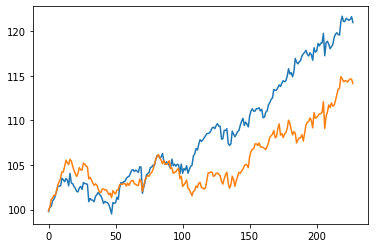

In [379]:
plt.plot(value_equal)
plt.plot(value_markowitz)

In [380]:
dfsp=pd.read_csv("S&P500.csv")

In [381]:
sp=dfsp.loc[(dfsp['caldt']>=20170201)&(dfsp['caldt']<=20171228)]['spindx'].values

In [382]:
sp=sp/sp[0]*100
len(sp)

230

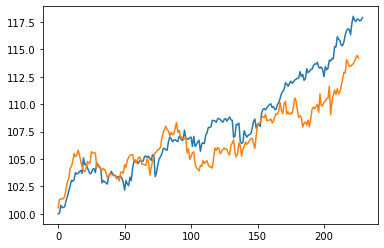

In [383]:
plt.plot(sp)
plt.plot(value)

In [384]:
dfdailyvalue=pd.DataFrame(index=dfstrategy.index, data=value_markowitz,columns=['value'])
dfdailyvalue.to_excel('DailyValueMarkowitz.xlsx')
dfdailyvalue=pd.DataFrame(index=dfstrategy.index, data=value_equal,columns=['value'])
dfdailyvalue.to_excel('DailyValueEqualWeights.xlsx')

In [385]:
np.std(dfdailyvalue['value'].pct_change())*np.sqrt(253)

0.08482852932505068

In [386]:
dv1=pd.read_excel('DailyValueEqualWeights.xlsx')

dv1

dv2=pd.read_excel('DailyValueMarkowitz.xlsx')

dv3=pd.read_excel('DailyValueMarket.xlsx')

def DailyValueReturn(dv):
    dv['returns']=dv['value'].pct_change()
    ret=dv.returns.to_numpy()
    ret=ret[1:]
    return ret

from scipy.stats import skew
from scipy.stats import kurtosis
import ffn

def stats(dv):
        ret=DailyValueReturn(dv)
        
        annualized_ret=np.mean(ret) * 253
        print('annualized_ret: ', annualized_ret) 

        annualized_std=np.std(ret)*np.sqrt(253)
        print('annualized_std: ', annualized_std) 
 
        sharpe=(annualized_ret-0.0447)/annualized_std
        print('sharpe',sharpe)

        skewness=skew(ret)
        print('skewness',skewness) 

        maxR, maxD = 0, 0
        cR, cD = 0, 0
        for ele in ret:
            cR += ele
            if cR > maxR:
                maxR = cR
                cD = 0
            else:
                cD += ele
                if cD < maxD:
                    maxD = cD
        print('calc_max_drawdown',maxD - maxR) 


def stats2(dv):
    dv['returns']=dv['value'].pct_change()
    ret=dv.returns[1:]
    
    k=kurtosis(ret)
    print('kurtosis: ', k)
    
    s=ffn.calc_sortino_ratio(ret)
    print('sortino: ',s) 



## Equal Weight

In [387]:
stats(dv1)
stats2(dv1)

annualized_ret:  0.21870606122057673
annualized_std:  0.0848285293250509
sharpe 2.051268159486889
skewness -1.0538342082906174
calc_max_drawdown -0.24625380768266947
kurtosis:  5.107194259005865
sortino:  0.253724713736986


## Markowitz

In [388]:
stats(dv2)
stats2(dv2)

annualized_ret:  0.152276453198875
annualized_std:  0.07867934540218034
sharpe 1.3672769219034946
skewness -0.8089693624066032
calc_max_drawdown -0.18764707946364012
kurtosis:  3.921553458893454
sortino:  0.1952189624205887


## Market

In [389]:
stats(dv3)
stats2(dv3)

annualized_ret:  0.18439953925334746
annualized_std:  0.06727824197758223
sharpe 2.076444555431409
skewness -0.5097781549013236
calc_max_drawdown -0.1952742612746421
kurtosis:  3.114491925423656
sortino:  0.2920866942968899


In [402]:
temp=df_sector[df_sector['Symbol'].isin(selectstock)]
temp.sort_values(by='Sector')

,Symbol,Name,Sector
329,NFLX,Netflix Inc.,Communication Services
116,CMCSA,Comcast Corp.,Communication Services
443,DIS,The Walt Disney Company,Communication Services
53,T,AT&T Inc.,Communication Services
471,VZ,Verizon Communications,Communication Services
183,FB,Facebook Inc.,Communication Services
24,GOOG,Alphabet Inc. (Class C),Communication Services
23,GOOGL,Alphabet Inc. (Class A),Communication Services
336,NKE,Nike Inc.,Consumer Discretionary
230,HD,Home Depot,Consumer Discretionary


In [403]:
for i in selectstock:
    l=df_sector[df_sector['Symbol']==i].values[0]
    a=l[0]
    b=l[1]
    c=l[2]
    print(a,'&',b,'\\')
    print('\hline')

CMCSA & Comcast Corp. \
\hline
DGX & Quest Diagnostics \
\hline
ALXN & Alexion Pharmaceuticals \
\hline
KO & Coca-Cola Company \
\hline
UNH & United Health Group Inc. \
\hline
V & Visa Inc. \
\hline
T & AT&T Inc. \
\hline
IRM & Iron Mountain Incorporated \
\hline
MA & Mastercard Inc. \
\hline
VRSN & Verisign Inc. \
\hline
PYPL & PayPal \
\hline
NOV & National Oilwell Varco Inc. \
\hline
CHRW & C. H. Robinson Worldwide \
\hline
DIS & The Walt Disney Company \
\hline
MRK & Merck & Co. \
\hline
PEP & PepsiCo Inc. \
\hline
ZION & Zions Bancorp \
\hline
AMZN & Amazon.com Inc. \
\hline
GOOG & Alphabet Inc. (Class C) \
\hline
VZ & Verizon Communications \
\hline
NEE & NextEra Energy \
\hline
FB & Facebook Inc. \
\hline
CRM & Salesforce.com \
\hline
MSFT & Microsoft Corp. \
\hline
AAPL & Apple Inc. \
\hline
TXN & Texas Instruments \
\hline
COST & Costco Wholesale Corp. \
\hline
DHR & Danaher Corp. \
\hline
NKE & Nike Inc. \
\hline
NVDA & Nvidia Corporation \
\hline
WMT & Walmart \
\hline
ANSS 